In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from finance_utils.backtest import *
import seaborn as sns

In [2]:
times = ['2015-01-01', '2005-01-01', '1995-01-01', '1985-01-01']
tickers = ['^GSPC', '^RUT', '^NDX', '^HSI', '^990100-USD-STRD', 'AGG', 'GC=F', 'CL=F']
alternatives = ['BTC-USD']
# S&P 500, Russell 2000, Nasdaq 100, Hang Seng Index, MSCI World Index, US Aggregate Bond, Gold, Oil
df = yf.download(tickers, start=times[-1]).dropna()
df /= df.iloc[0]

[*********************100%%**********************]  8 of 8 completed


In [3]:
prices = df['Close']
all_gold = prices['GC=F']
all_stocks = prices['^GSPC']
all_oil = prices['CL=F']
# all_stocks = 
all_bond = prices['AGG'].copy()
bond_cum_ret = all_bond.pct_change().fillna(0) + 1
avg_dividend_yield = 0.0246 / 12

In [4]:
bond_price_plus_dividend = None
for i in range(len(all_bond)):
    if i == 0:
        continue
    
    all_bond.iloc[i] = all_bond.iloc[i - 1] * bond_cum_ret.iloc[i]
    
    if all_bond.index[i].month != all_bond.index[i - 1].month:
        all_bond.iloc[i] = all_bond.iloc[i] + (prices['AGG'].iloc[i] * avg_dividend_yield)

sixty_forty = 0.6 * all_stocks + 0.4 * all_bond
stock_bond_gold = 0.54 * all_stocks + 0.36 * all_bond + 0.1 * all_gold
stock_bond_commodity = 0.5 * all_stocks + 0.3 * all_bond + 0.1 * all_gold + 0.1 * all_oil

s&p 500

---- Running the backtest... ----
---- Backtesting completed ----

Annualised Return (Geo): 0.09065062682239788
Avg Annual Return (Ari): 0.09042118452577842
Volatility (Std): 0.19267929605828055
Sharpe Ratio: 0.4704741437034231
Downside Volatility: 0.13739820502285796
Sortino Ratio: 0.6597657284337666
VaR 99: -0.03450222081435239
VaR 99 (Year): -0.3388201416079735
CVaR 99: -0.05139188277073059
CVaR 99 (Year): -0.3758465002718231
Initial Value: 1.0
Peak Value: 5.630153687828144
Final Value: 5.611476292440241
Max Drawdown: 0.5677538774277282
Avg Drawdown: 0.09633702714781282
Calmar Ratio: 0.15966535928050477
Sterling Ratio: 0.9409738862224789


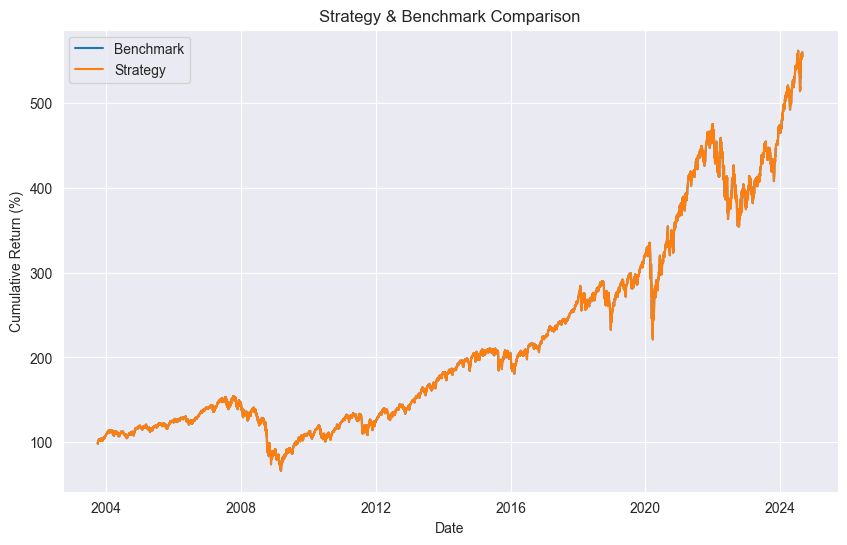

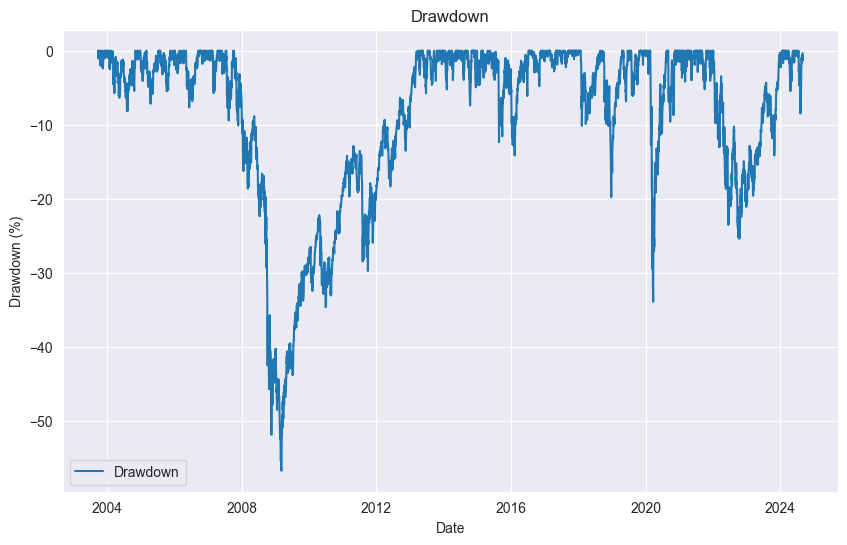

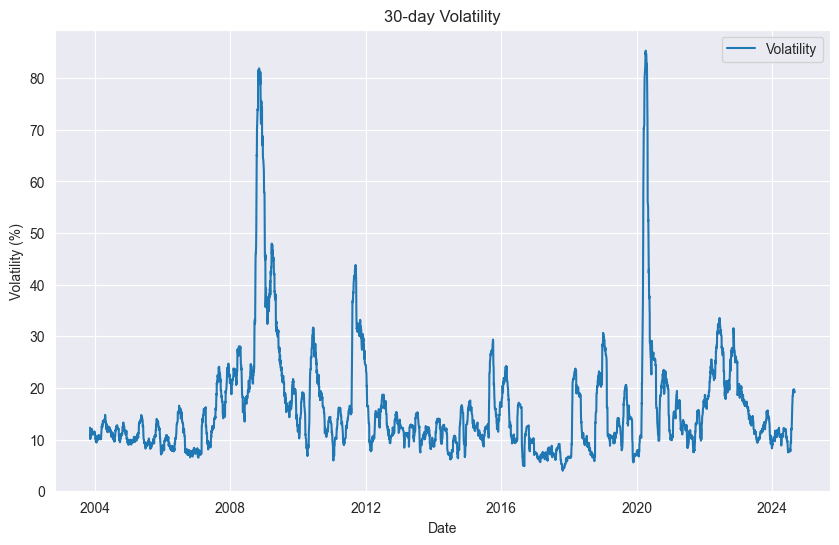

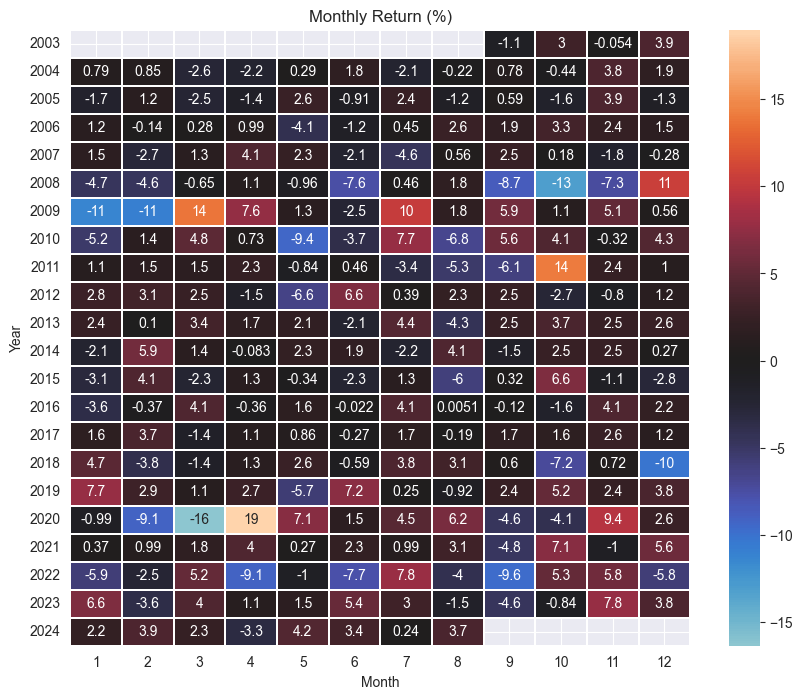

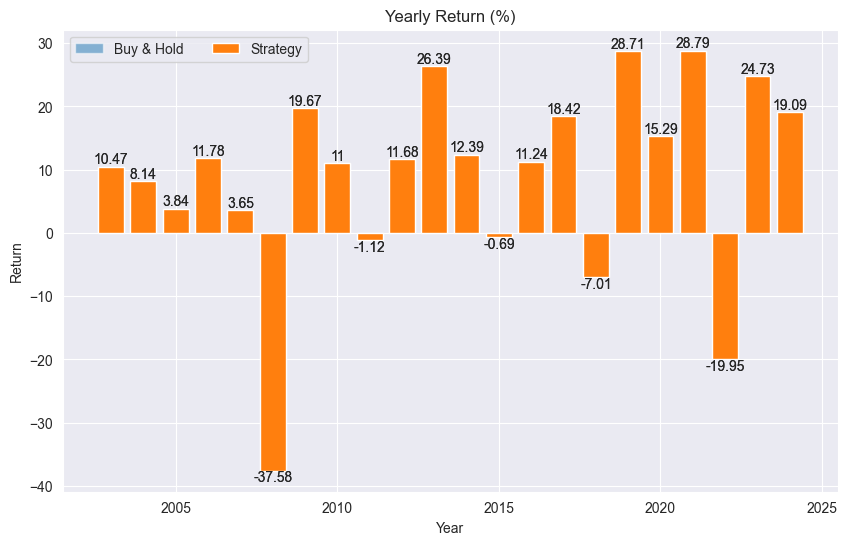

In [5]:
df1 = pd.DataFrame()
df1['Price'] = all_stocks
df1['Value'] = all_stocks
df1['Return'] = df1['Value'].pct_change()

test_sp500 = Backtest(df1)

60/40 vs s&p 500

---- Running the backtest... ----
---- Backtesting completed ----

Annualised Return (Geo): 0.07170930076035176
Avg Annual Return (Ari): 0.06848958820054066
Volatility (Std): 0.12807860532605397
Sharpe Ratio: 0.5598850844588681
Downside Volatility: 0.09150593881040144
Sortino Ratio: 0.7836573417265524
VaR 99: -0.02336942462471921
VaR 99 (Year): -0.22353495361385048
CVaR 99: -0.03401525501719039
CVaR 99 (Year): -0.23328031105778363
Initial Value: 1.0
Peak Value: 3.9613210900226568
Final Value: 3.9613210900226568
Max Drawdown: 0.3772565920587181
Avg Drawdown: 0.06061157410905389
Calmar Ratio: 0.19008097477907177
Sterling Ratio: 1.1830958330059298
Alpha: 3.541274797306144e-05
Beta: 0.6504304039570535
R^2: 0.9784965416378907


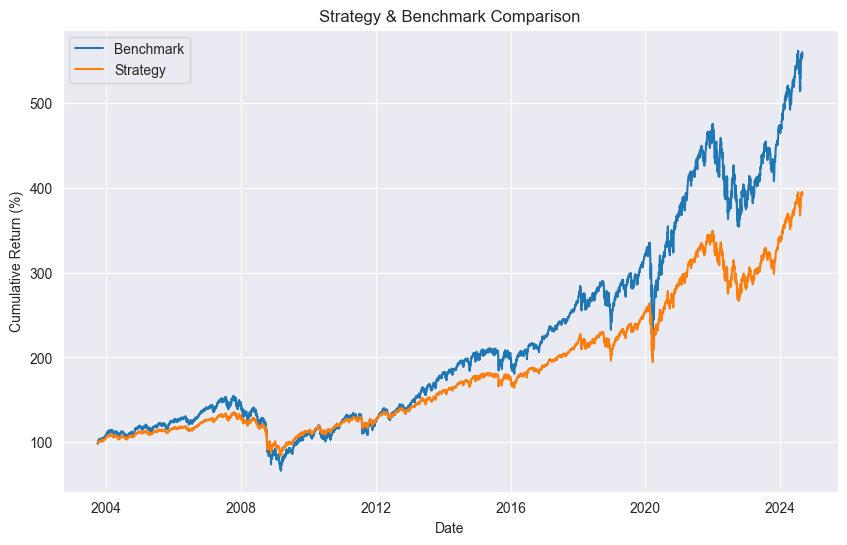

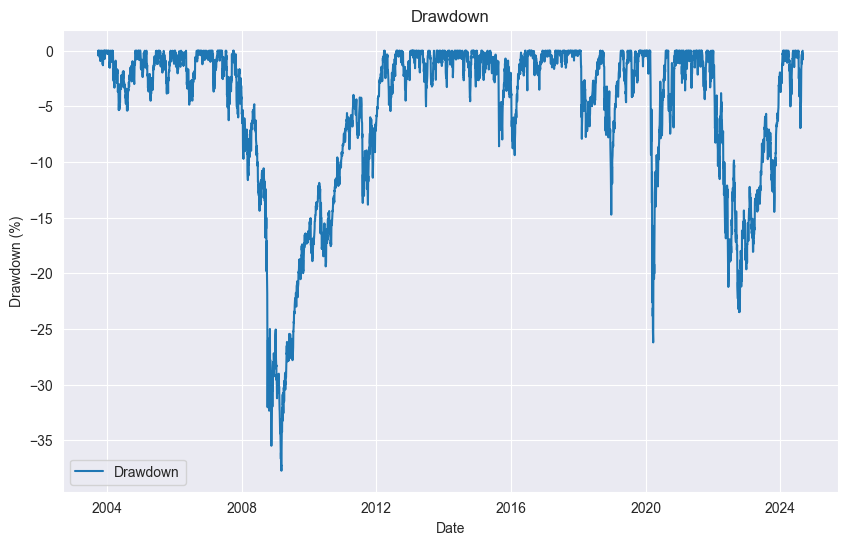

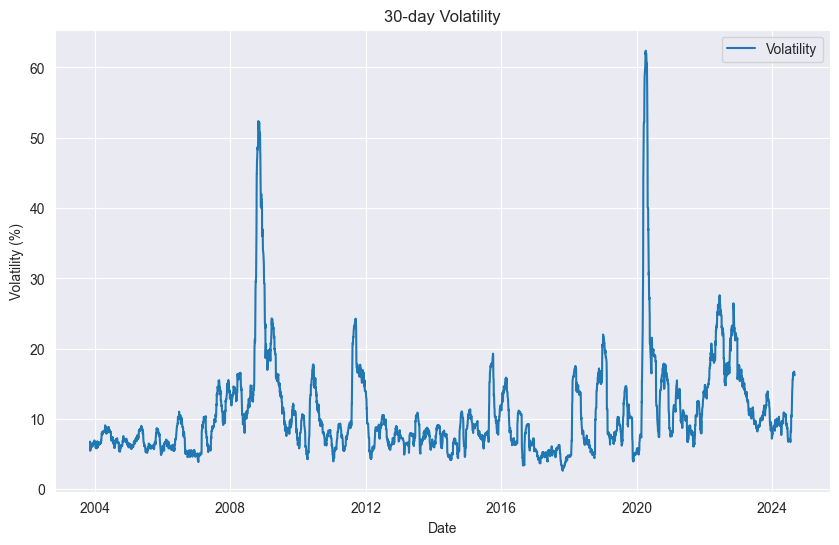

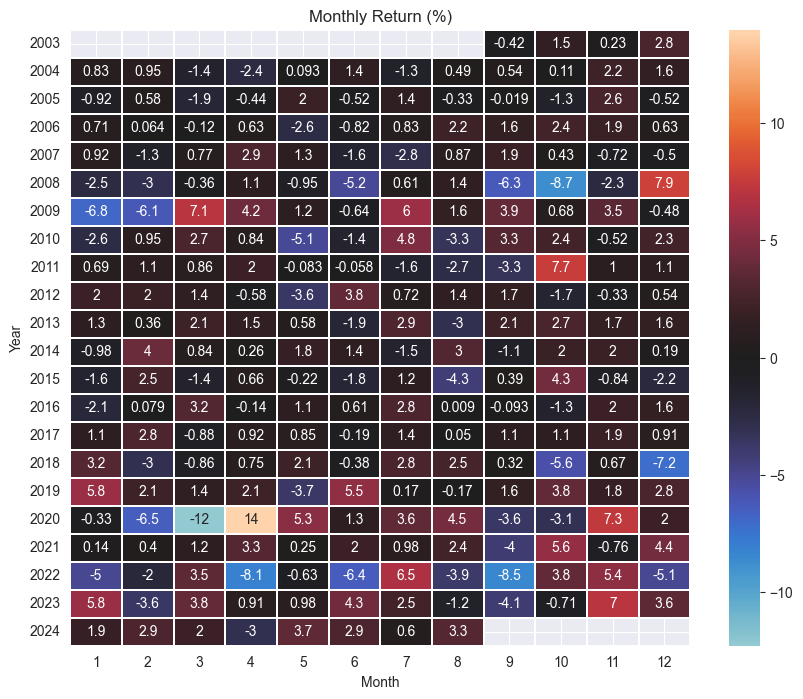

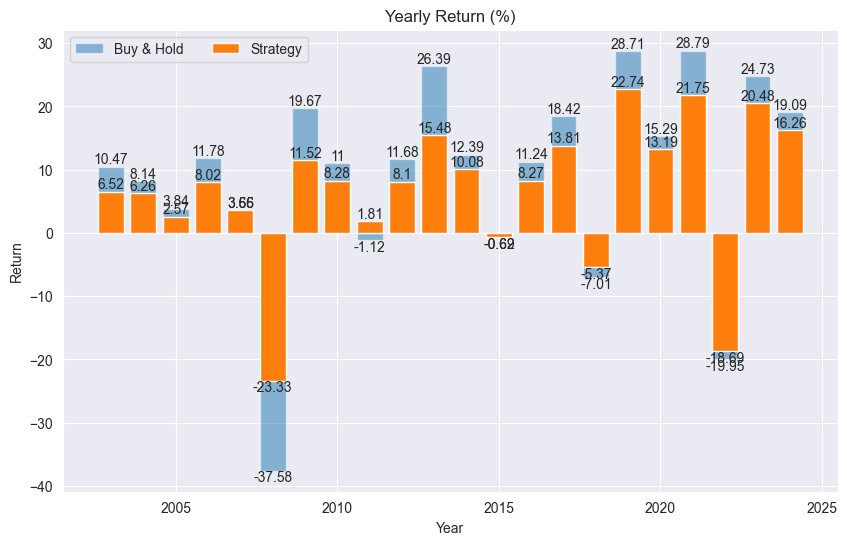

In [6]:
df1 = pd.DataFrame()
df1['Price'] = all_stocks
df1['Value'] = sixty_forty
df1['Return'] = df1['Value'].pct_change()

test_60_40 = Backtest(df1)

---- Running the backtest... ----
---- Backtesting completed ----

Annualised Return (Geo): 0.07509120775950673
Avg Annual Return (Ari): 0.0693180163253272
Volatility (Std): 0.11223554713801129
Sharpe Ratio: 0.669050133173675
Downside Volatility: 0.0799162405145109
Sortino Ratio: 0.9396238771501262
VaR 99: -0.019873647158690867
VaR 99 (Year): -0.1846277626351666
CVaR 99: -0.029442621330254683
CVaR 99 (Year): -0.19087196126138276
Initial Value: 1.0
Peak Value: 4.217333355662614
Final Value: 4.217333355662614
Max Drawdown: 0.30956146187042943
Avg Drawdown: 0.04394537721803764
Calmar Ratio: 0.24257285550272092
Sterling Ratio: 1.7087396334530747
Alpha: 8.687264422232261e-05
Beta: 0.5391737047073123
R^2: 0.9256212717383913


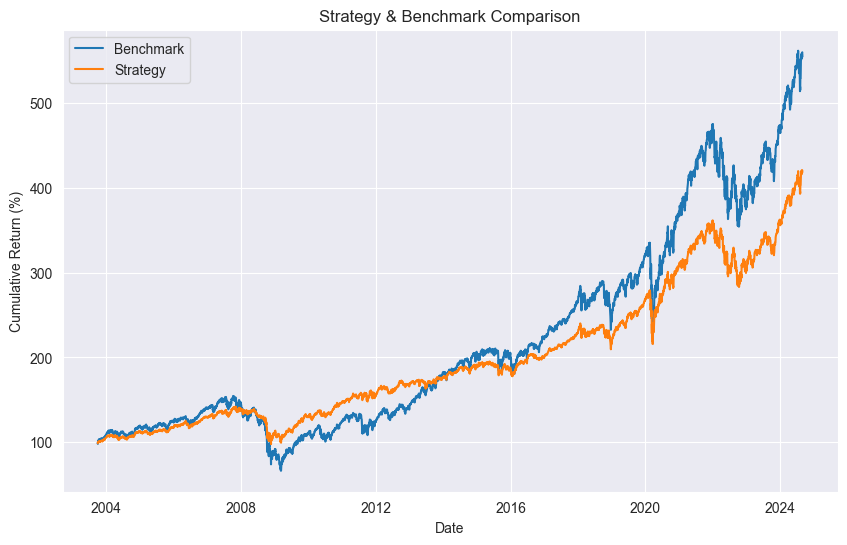

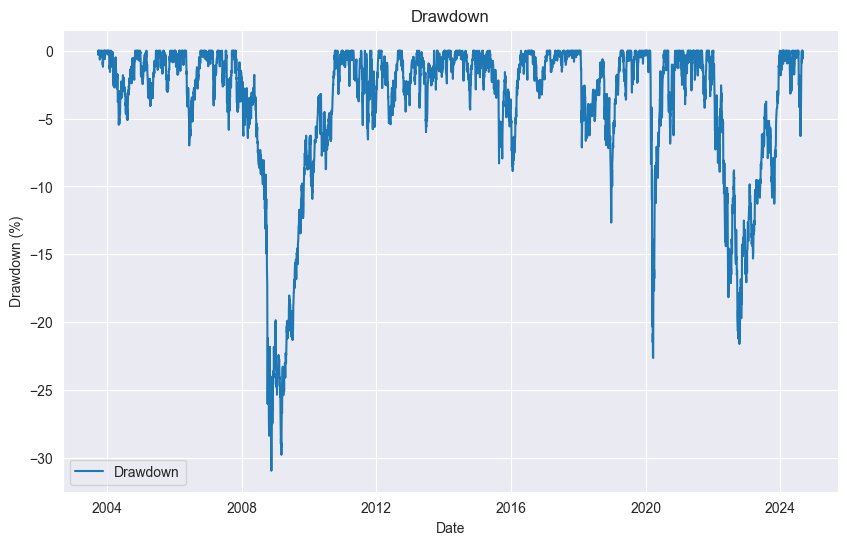

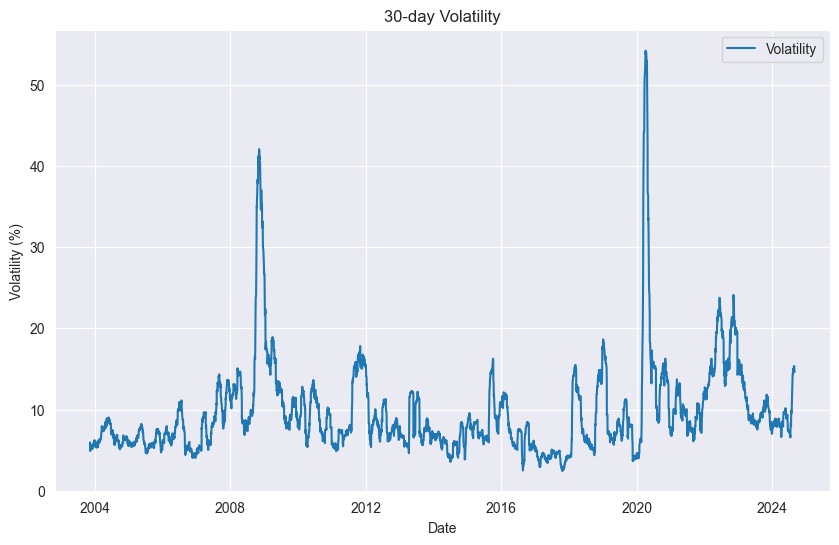

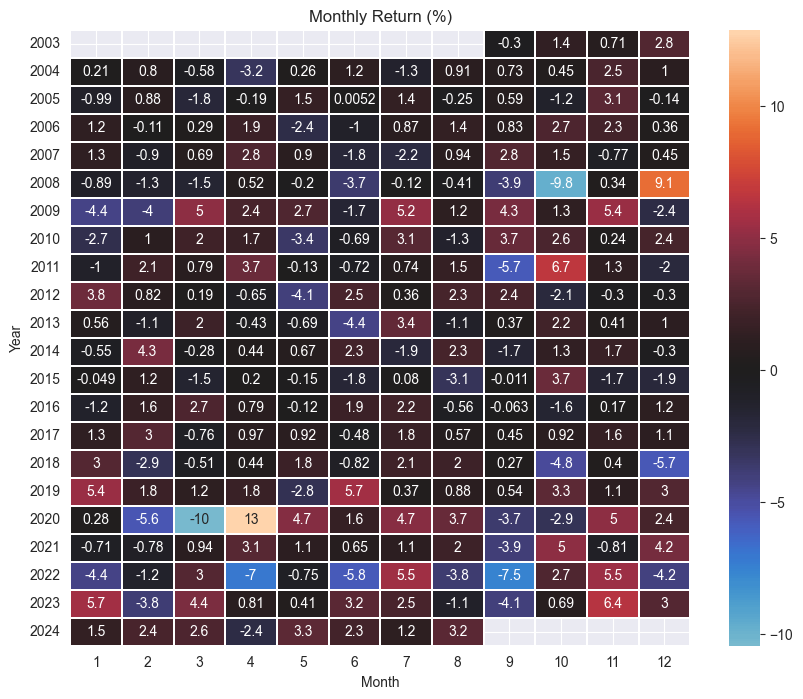

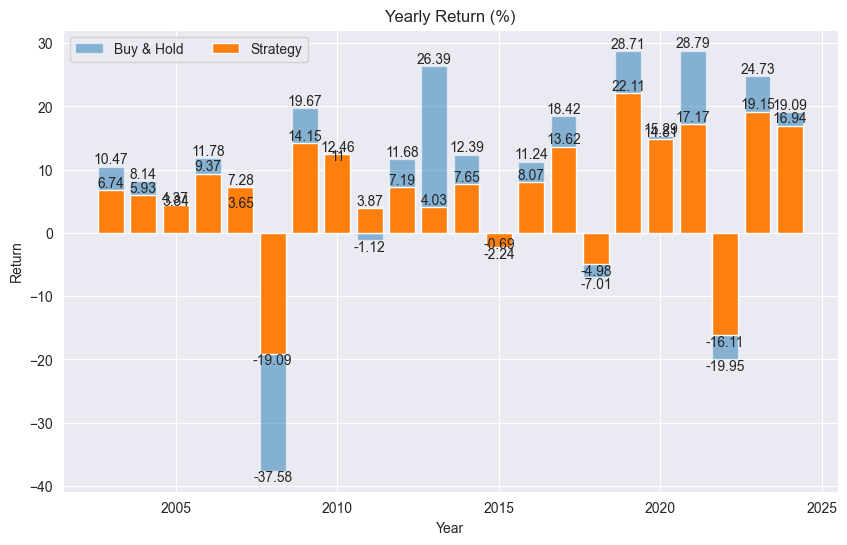

In [7]:
df1 = pd.DataFrame()
df1['Price'] = all_stocks
df1['Value'] = stock_bond_gold
df1['Return'] = df1['Value'].pct_change()

test_stock_bond_gold = Backtest(df1)

---- Running the backtest... ----
---- Backtesting completed ----

Annualised Return (Geo): 0.07438603183316972
Avg Annual Return (Ari): 0.07062023913527025
Volatility (Std): 0.12804578535421357
Sharpe Ratio: 0.5809330750512041
Downside Volatility: 0.0928600326221017
Sortino Ratio: 0.8010554135371372
VaR 99: -0.022700409633433748
VaR 99 (Year): -0.2451071714595273
CVaR 99: -0.03501576591567132
CVaR 99 (Year): -0.27202060636196806
Initial Value: 1.0
Peak Value: 4.180605091433725
Final Value: 4.162687894244902
Max Drawdown: 0.38592380244707825
Avg Drawdown: 0.06002821880096831
Calmar Ratio: 0.1927479760551185
Sterling Ratio: 1.2391843922573595
Alpha: 8.808147605766836e-05
Beta: 0.5483063893936176
R^2: 0.8250743188490522


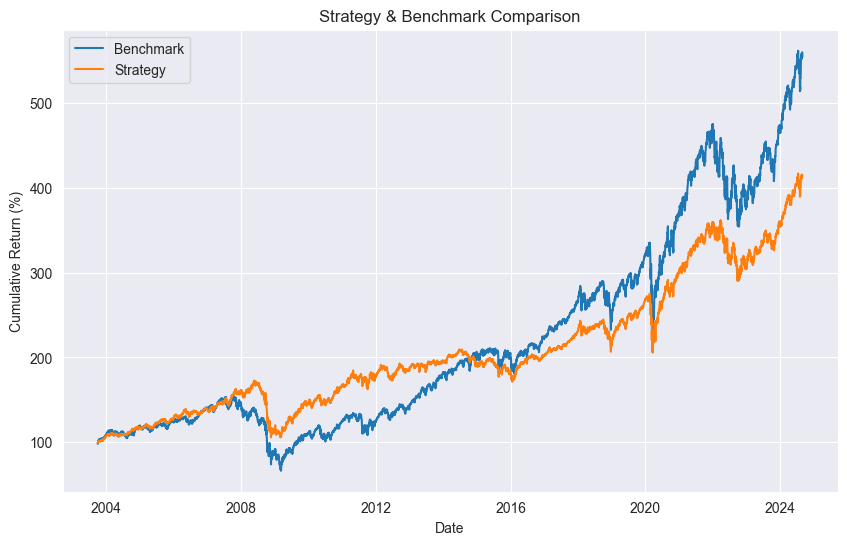

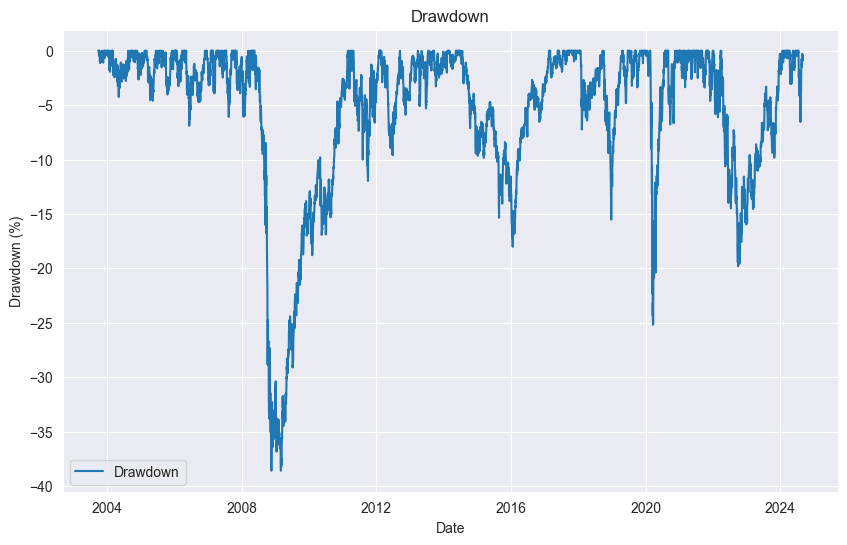

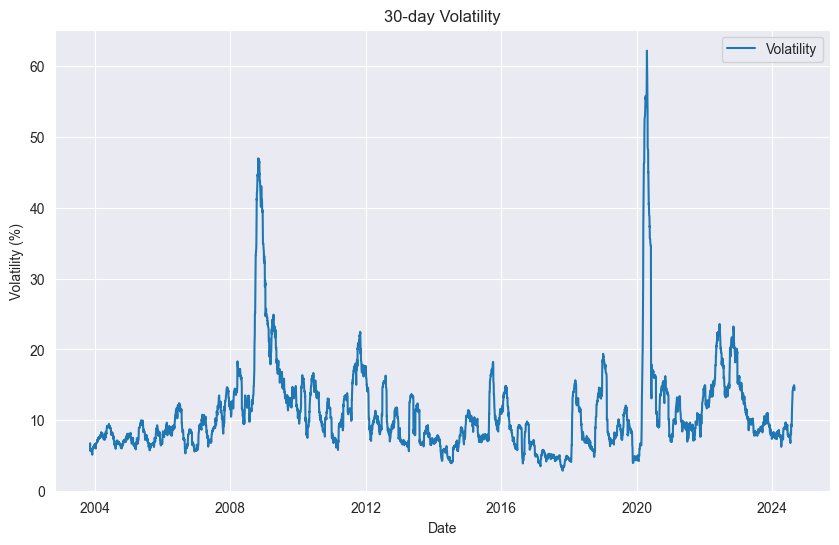

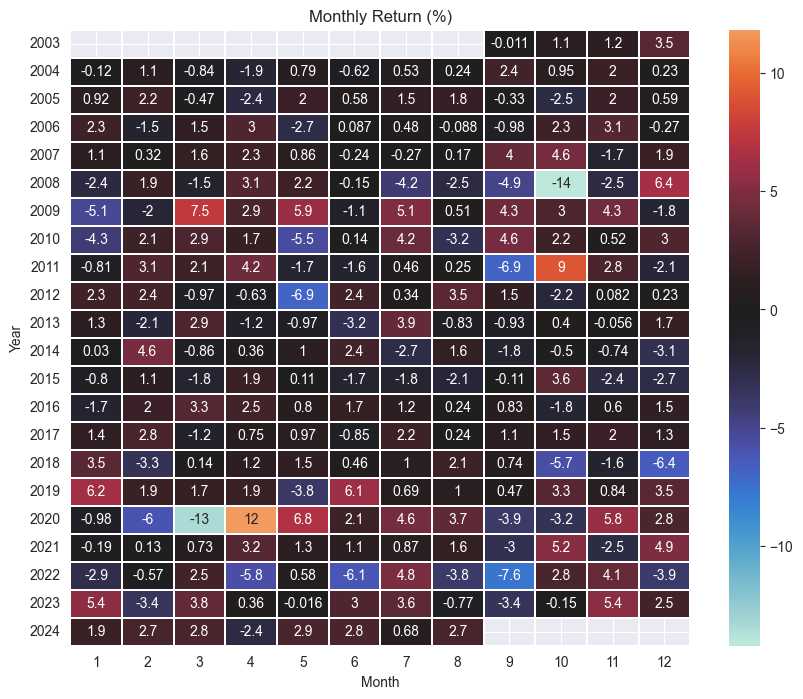

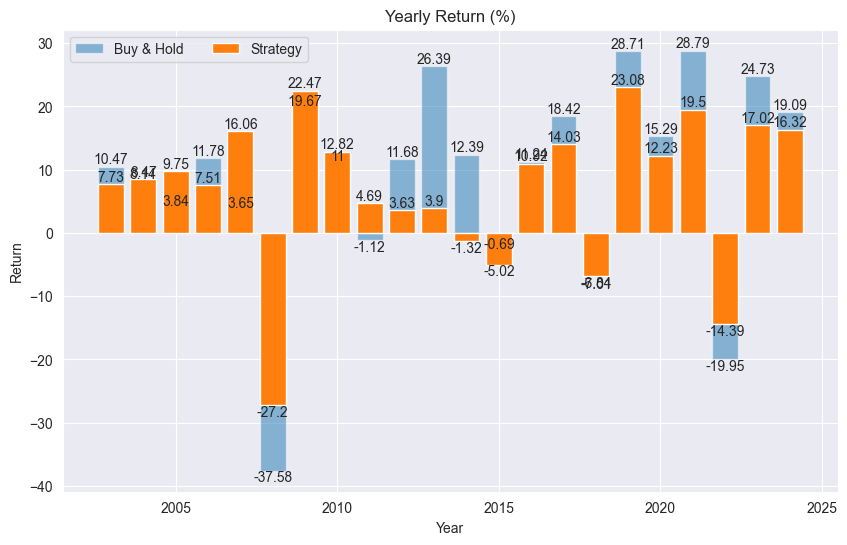

In [8]:
df1 = pd.DataFrame()
df1['Price'] = all_stocks
df1['Value'] = stock_bond_commodity
df1['Return'] = df1['Value'].pct_change()

test_stock_bond_commodity = Backtest(df1)

---- Running the backtest... ----
---- Backtesting completed ----

Annualised Return (Geo): 0.02012988034302987
Avg Annual Return (Ari): 0.017864673768584687
Volatility (Std): 0.05387202427990377
Sharpe Ratio: 0.3736611091211408
Downside Volatility: 0.03956830645776287
Sortino Ratio: 0.5087374756490396
VaR 99: -0.008486559726451405
VaR 99 (Year): -0.1080746052124528
CVaR 99: -0.014069065468873031
CVaR 99 (Year): -0.13065033213488442
Initial Value: 1.0
Peak Value: 1.6581582034511608
Final Value: 1.4860882863962805
Max Drawdown: 0.1915689134180062
Avg Drawdown: 0.030736829471972878
Calmar Ratio: 0.1050790547582539
Sterling Ratio: 0.6549107597901448


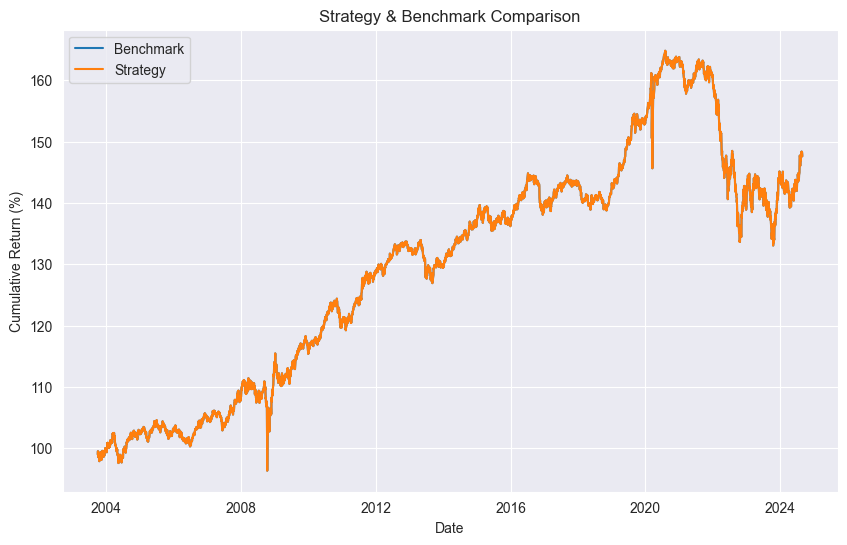

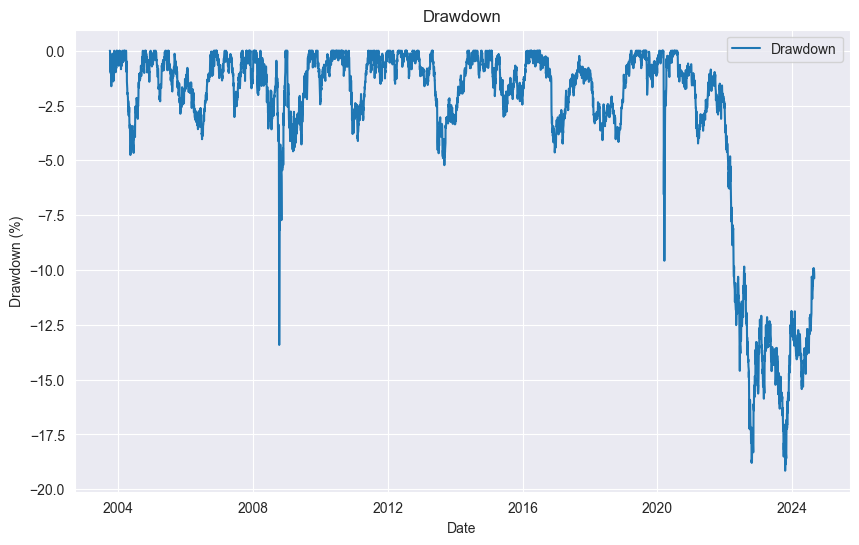

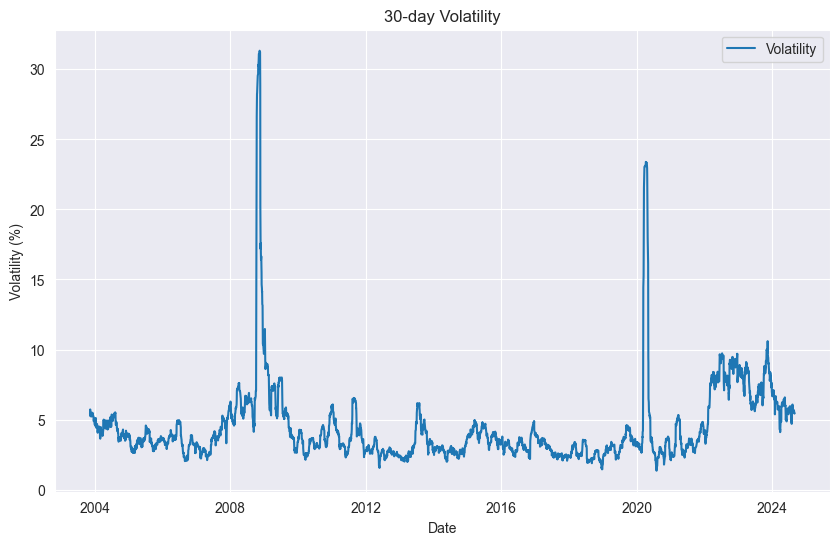

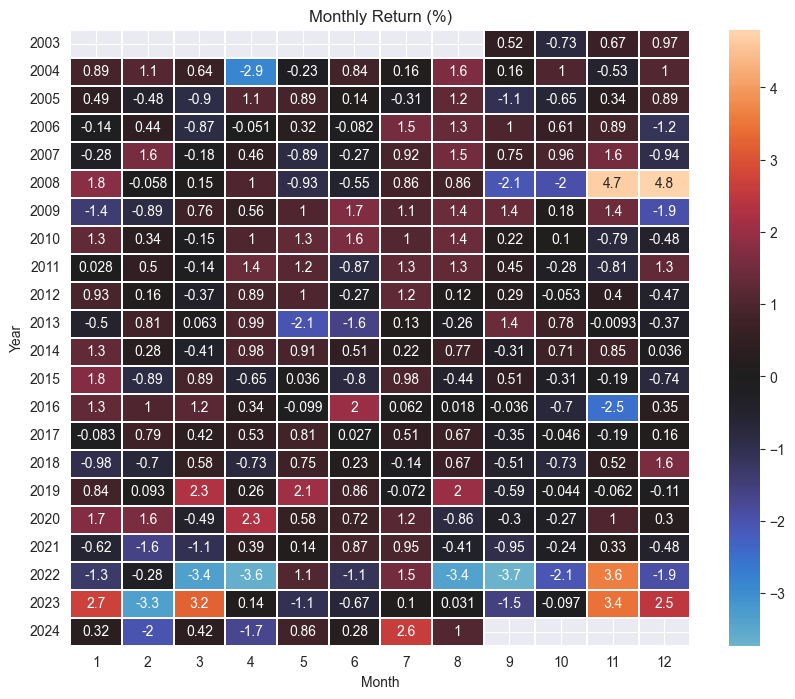

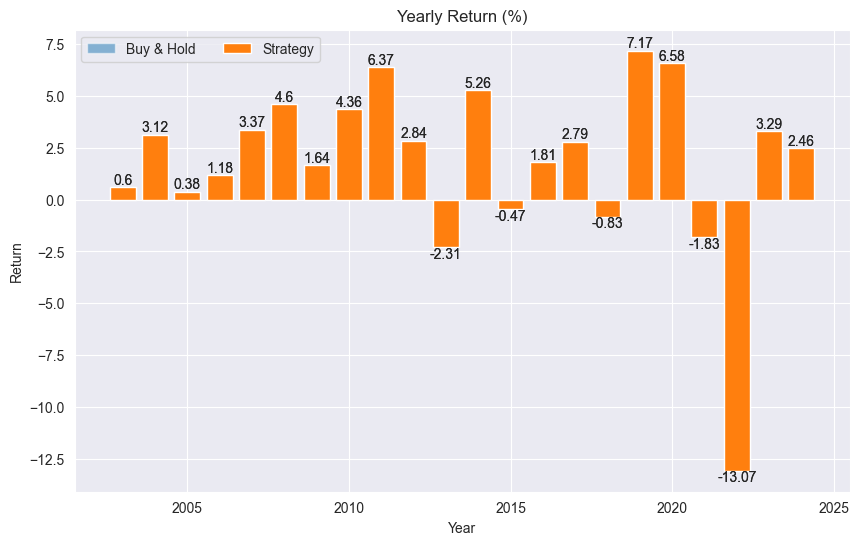

In [9]:
df1 = pd.DataFrame()
df1['Price'] = all_bond
df1['Value'] = all_bond
df1['Return'] = df1['Value'].pct_change()

test_bond = Backtest(df1)

gold

---- Running the backtest... ----
---- Backtesting completed ----

Annualised Return (Geo): 0.09892785202335186
Avg Annual Return (Ari): 0.09080872851313003
Volatility (Std): 0.1799533971082461
Sharpe Ratio: 0.5497415087076377
Downside Volatility: 0.12673189085023337
Sortino Ratio: 0.780607401654417
VaR 99: -0.031209227864811614
VaR 99 (Year): -0.2497232371256966
CVaR 99: -0.041705676949117046
CVaR 99 (Year): -0.28793174534653493
Initial Value: 1.0
Peak Value: 6.60486399446853
Final Value: 6.521443746422225
Max Drawdown: 0.44363844125895235
Avg Drawdown: 0.1651112197170091
Calmar Ratio: 0.2229920647602482
Sterling Ratio: 0.5991588711712528


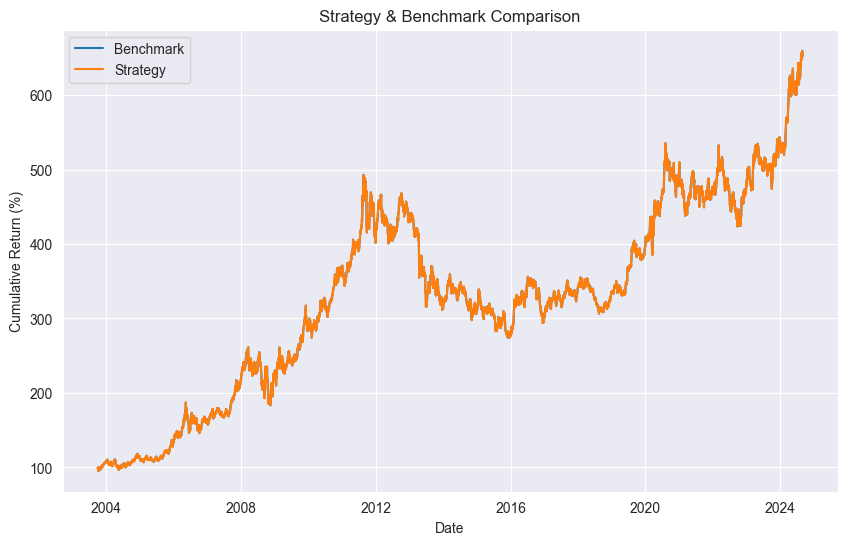

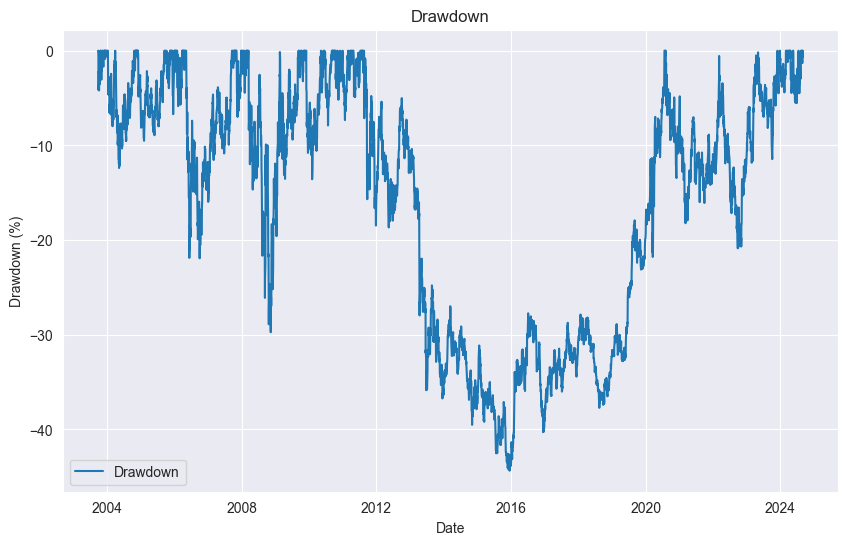

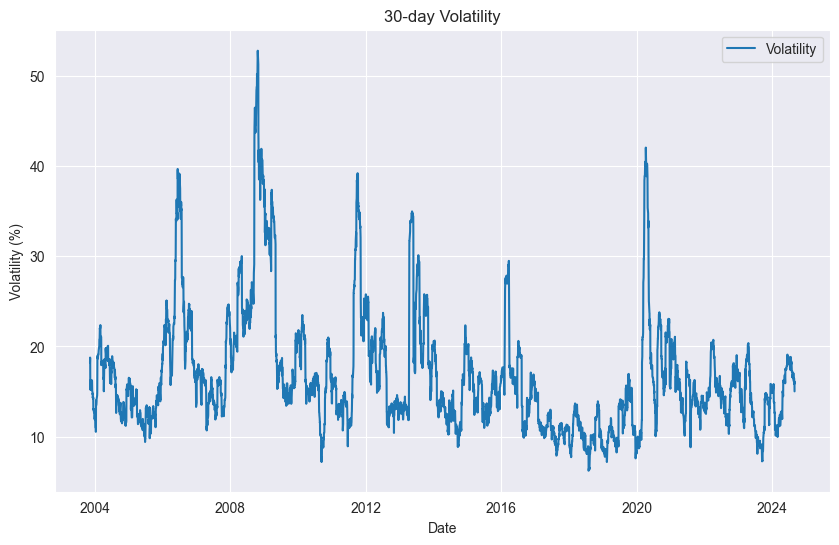

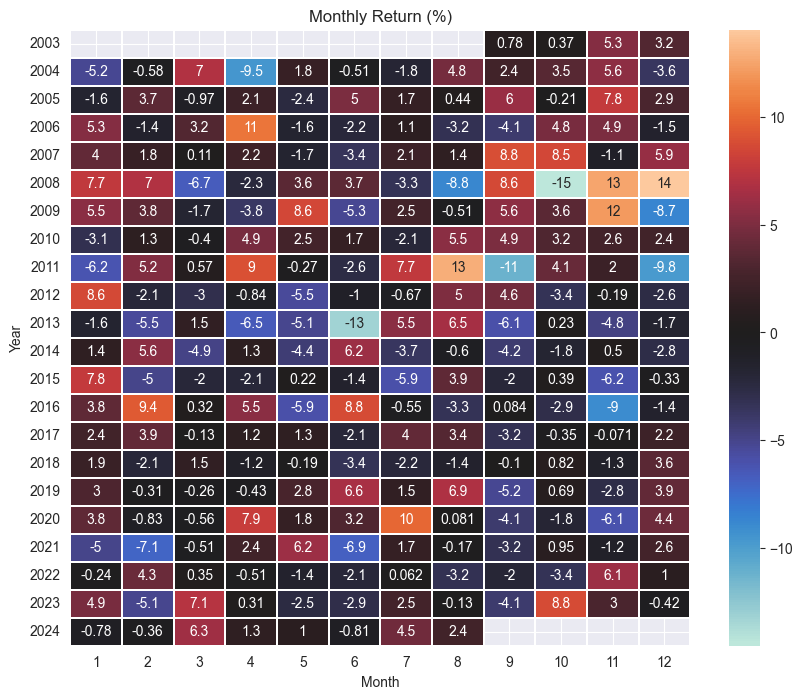

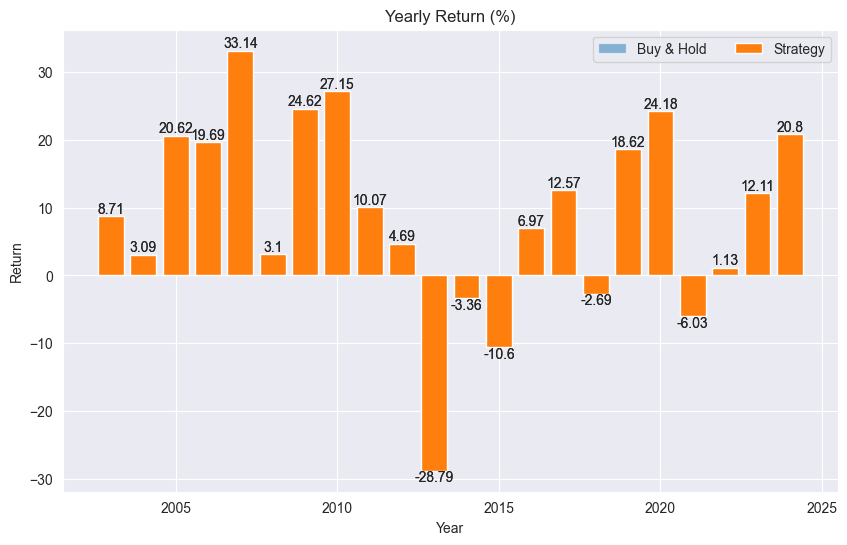

In [10]:
df1 = pd.DataFrame()
df1['Price'] = all_gold
df1['Value'] = all_gold
df1['Return'] = df1['Value'].pct_change()

test_gold = Backtest(df1)

oil

---- Running the backtest... ----
---- Backtesting completed ----

Annualised Return (Geo): 0.04903770915536687
Avg Annual Return (Ari): 0.09762919755241682
Volatility (Std): 0.859040508113267
Sharpe Ratio: 0.05708428030136747
Downside Volatility: 0.7971062985698029
Sortino Ratio: 0.06151966085746922
VaR 99: -0.0699114783023111
VaR 99 (Year): -0.529104163790873
CVaR 99: -0.18125085279394793
CVaR 99 (Year): -0.5522987628541164
Initial Value: 1.0
Peak Value: 5.115844902734957
Final Value: 2.589788874636756
Max Drawdown: 1.2589992622135169
Avg Drawdown: 0.4216274347732885
Calmar Ratio: 0.038949752098465046
Sterling Ratio: 0.11630578352126143


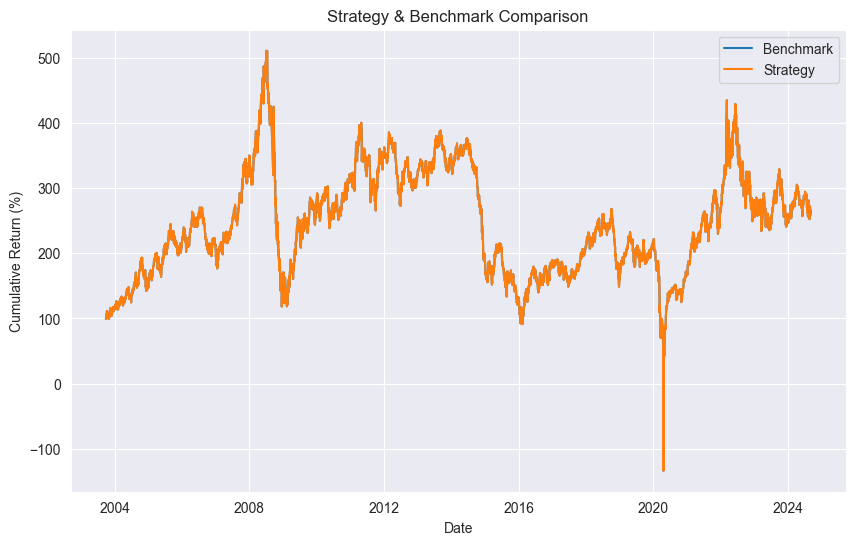

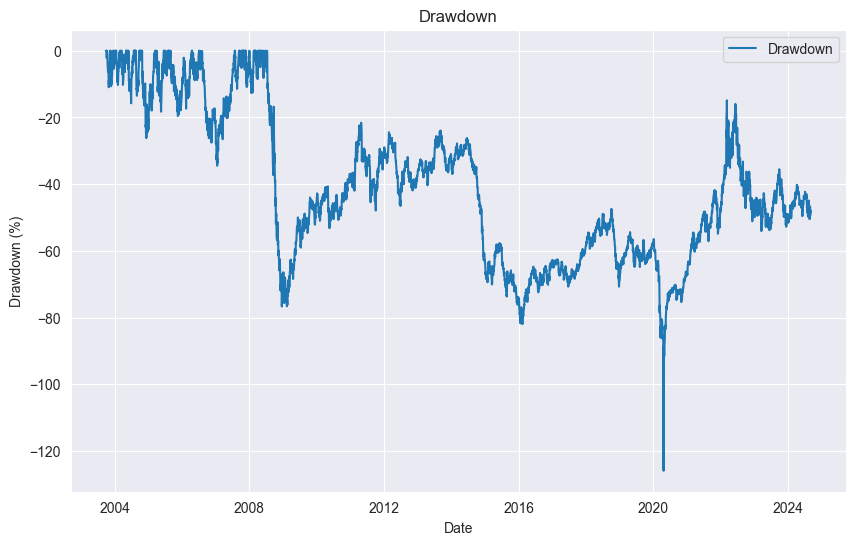

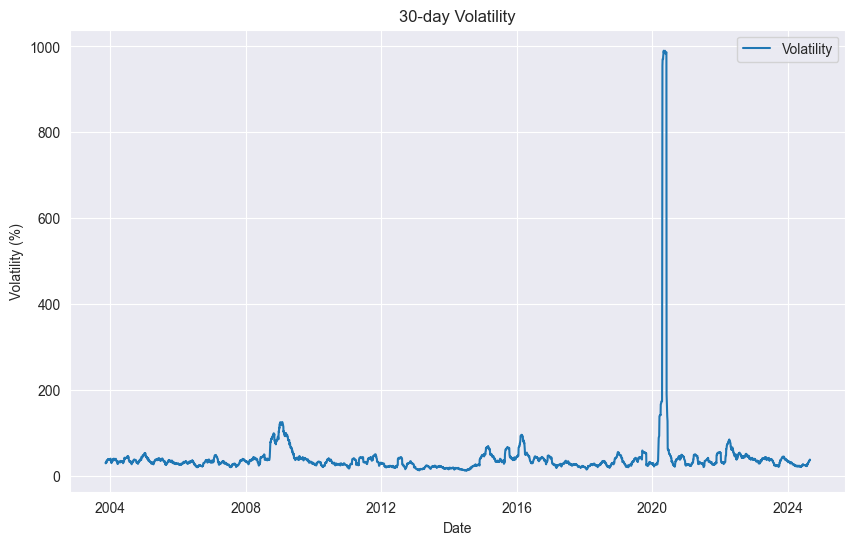

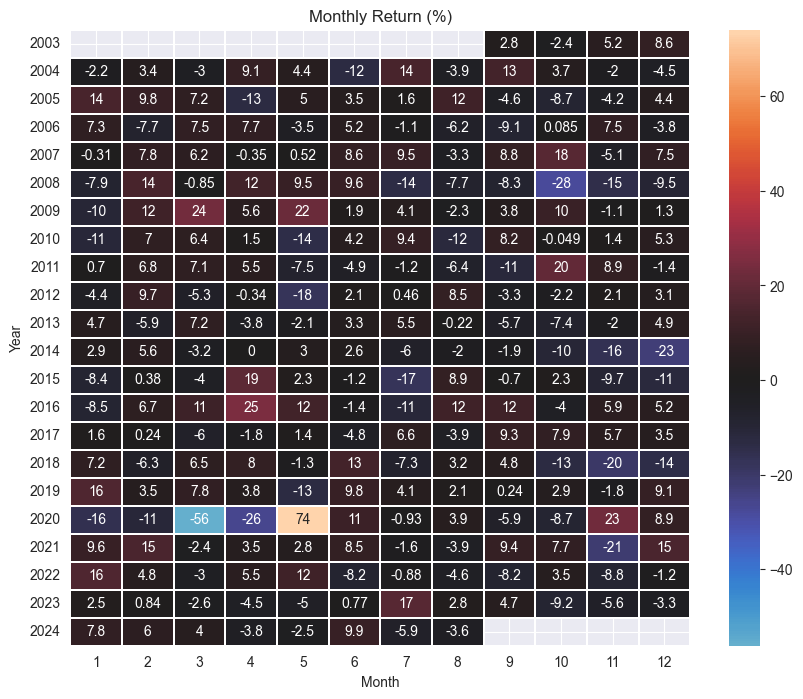

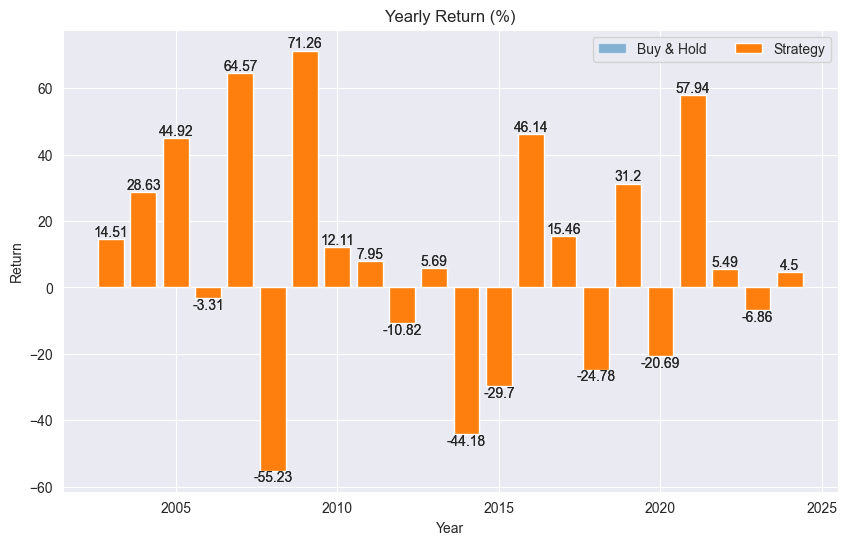

In [11]:
df1 = pd.DataFrame()
df1['Price'] = all_oil
df1['Value'] = all_oil
df1['Return'] = df1['Value'].pct_change()

test_oil = Backtest(df1)

In [12]:
cum_ret_60_40 = test_60_40.df['Value'] / test_60_40.df['Value'].iloc[0]
cum_ret_sp500 = test_sp500.df['Value'] / test_sp500.df['Value'].iloc[0]
cum_ret_60_40_with_gold = test_stock_bond_gold.df['Value'] / test_stock_bond_gold.df['Value'].iloc[0]
cum_ret_60_40_with_commodity = test_stock_bond_commodity.df['Value'] / test_stock_bond_commodity.df['Value'].iloc[0]
cum_rets = [cum_ret_60_40, cum_ret_sp500, cum_ret_60_40_with_gold]
labels = ['60/40', 'sp500', '60/40 with 10% gold']

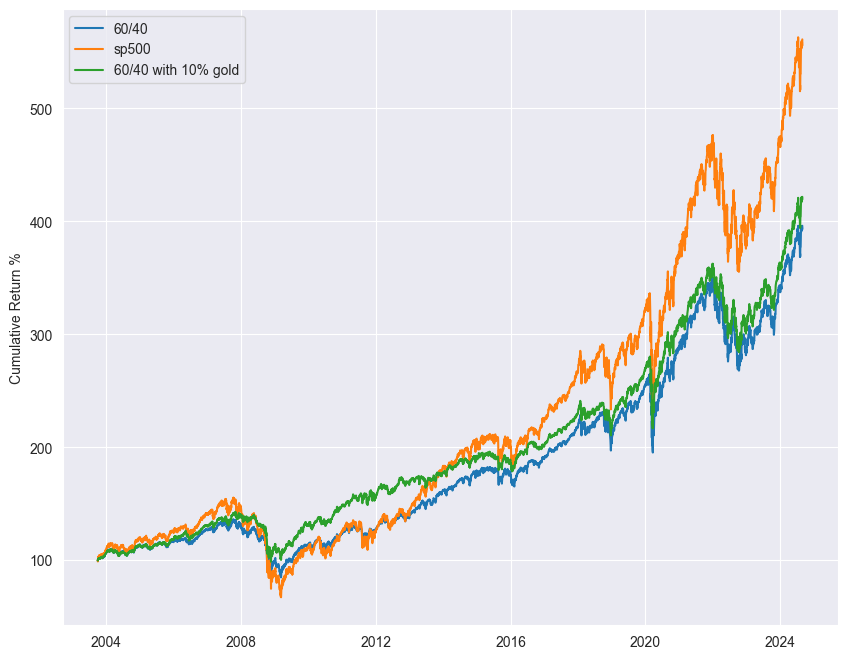

In [13]:
plt.figure(figsize=(10, 8))
for i, data in enumerate(cum_rets):
    plt.plot(data * 100, label=labels[i])

plt.ylabel('Cumulative Return %')
plt.legend()
plt.show()